In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

employ_df = pd.read_csv("Resources/cleanedstateemployment_monthly.csv")
employ_df.head()

,State,Year,Month,Value,1-Month % Change
0,Alabama,2000,1,4.7,-2.1
1,Alabama,2000,2,4.7,0.0
2,Alabama,2000,3,4.6,-2.1
3,Alabama,2000,4,4.6,0.0
4,Alabama,2000,5,4.5,-2.2


In [36]:
len(employ_df["State"].unique())


51

In [37]:
pollutant_df = pd.read_csv("Resources/cleaned_upollution_2005_2016.csv")
pollutant_df.head()
em_st = pollutant_df['State']

In [38]:
len(pollutant_df["State"].unique())

47

In [39]:
pollutant_df2 = pollutant_df.rename(columns = {"Sample Year": "Year", "Sample Month": "Month"})
pollutant_df2.head()
states_df = pollutant_df2.loc[pollutant_df2['Year'] == 2005].reset_index()
em_st = states_df['State']
pollutant_df3 = pollutant_df2[pollutant_df2.State.isin(em_st)]
pollutant_df3

,State,Year,Month,NO2 Units,Average of NO2 Mean,O3 Units,Average of O3 Mean,SO2 Units,Average of SO2 Mean,CO Units,Average of CO Mean
0,Arizona,2005,1,Parts per billion,22.674850,Parts per million,0.010018,Parts per billion,1.215276,Parts per million,0.661753
1,Arizona,2005,2,Parts per billion,19.542680,Parts per million,0.015479,Parts per billion,0.678611,Parts per million,0.466213
2,Arizona,2005,3,Parts per billion,19.674832,Parts per million,0.024243,Parts per billion,1.245270,Parts per million,0.523486
3,Arizona,2005,4,Parts per billion,21.509326,Parts per million,0.031231,Parts per billion,1.787622,Parts per million,0.605336
4,Arizona,2005,5,Parts per billion,19.719337,Parts per million,0.031362,Parts per billion,2.313748,Parts per million,0.565971
...,...,...,...,...,...,...,...,...,...,...,...
4001,Pennsylvania,2016,3,Parts per billion,6.083690,Parts per million,0.032102,Parts per billion,0.835163,Parts per million,0.044365
4012,Texas,2016,1,Parts per billion,12.180674,Parts per million,0.020181,Parts per billion,0.407665,Parts per million,0.260679
4013,Texas,2016,2,Parts per billion,12.557153,Parts per million,0.025816,Parts per billion,0.377478,Parts per million,0.256226
4014,Texas,2016,3,Parts per billion,8.369120,Parts per million,0.029457,Parts per billion,0.193121,Parts per million,0.195164


In [40]:
employ_pollutant = pollutant_df2.merge(employ_df, how = "inner")
employ_pollutant_year = employ_pollutant.groupby(["Year"]).mean()
employ_pollutant_year

,Month,Average of NO2 Mean,Average of O3 Mean,Average of SO2 Mean,Average of CO Mean,Value,1-Month % Change
Year,,,,,,,
2005,6.487047,15.707955,0.024888,3.139843,0.426073,5.089119,-0.473575
2006,6.468504,13.773114,0.025567,2.844463,0.376567,4.564173,-0.584252
2007,6.466667,12.507063,0.025739,2.380635,0.348483,4.337895,0.372982
2008,6.531773,11.314656,0.025464,1.871283,0.294194,5.285953,3.387960
2009,6.528428,10.015557,0.025085,1.611979,0.281375,8.462207,2.184615
2010,6.407285,10.433790,0.026983,1.427156,0.294650,8.786424,-0.439073
2011,6.477041,11.178029,0.026745,1.212832,0.282825,8.062755,-0.711224
2012,6.543590,10.516482,0.027545,0.933885,0.284704,7.390256,-0.650769
2013,6.522727,10.160166,0.026451,0.899359,0.260476,6.860606,-1.056818


In [41]:
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x*slope + intercept
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    return regress_values

#Creating function to return a string of linear regression equation
def linear_regression_eq(x, y):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2)) +", r= " + str(round(rvalue,2))
    return line_eq

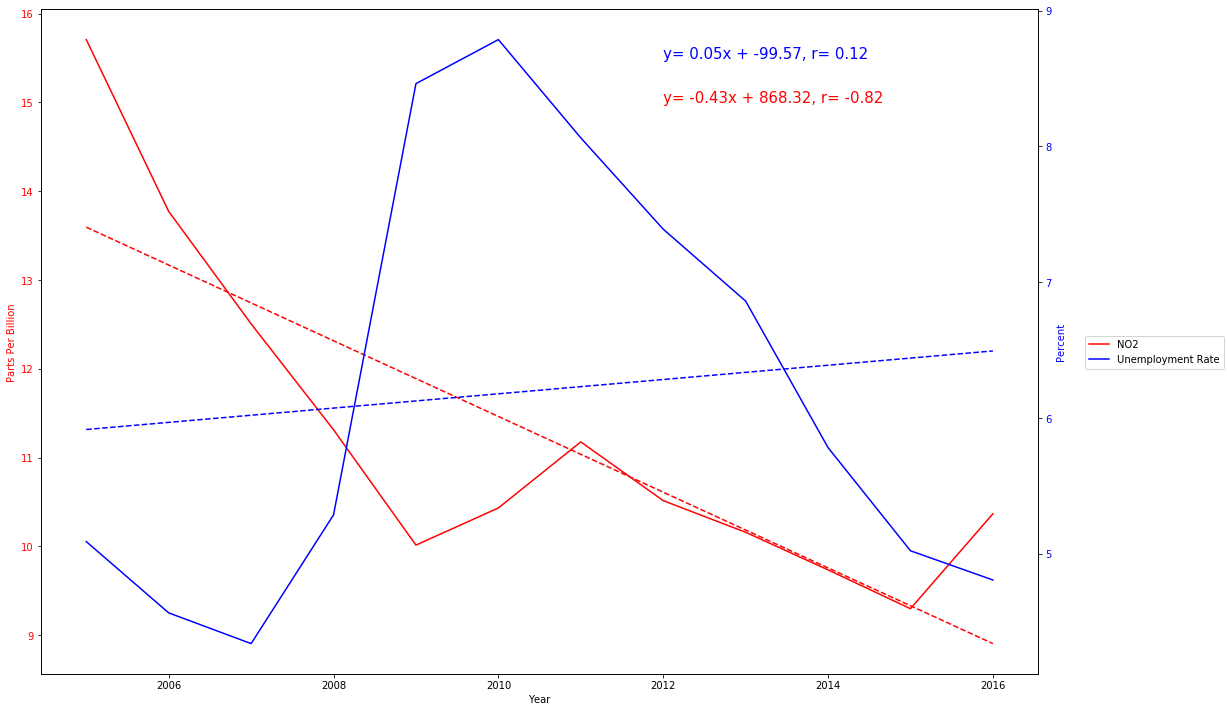

In [132]:
no2_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Value"])

no2_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"])
employ_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Value"])

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Billion', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of NO2 Mean"], color=color, label = "NO2")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,no2_line,color = 'red', linestyle = '--')
ax1.annotate(no2_line_eq, (2012,15), fontsize = 15, color = "red")
ax1.annotate(employ_line_eq, (2012,15.5), fontsize = 15, color = "blue")
ax2 = ax1.twinx()  
color = 'blue'
ax2.set_ylabel('Percent', color=color)
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line,'b--')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.tight_layout()
plt.show()

fig.savefig('Images/NO2_vs_Unemployment.png')


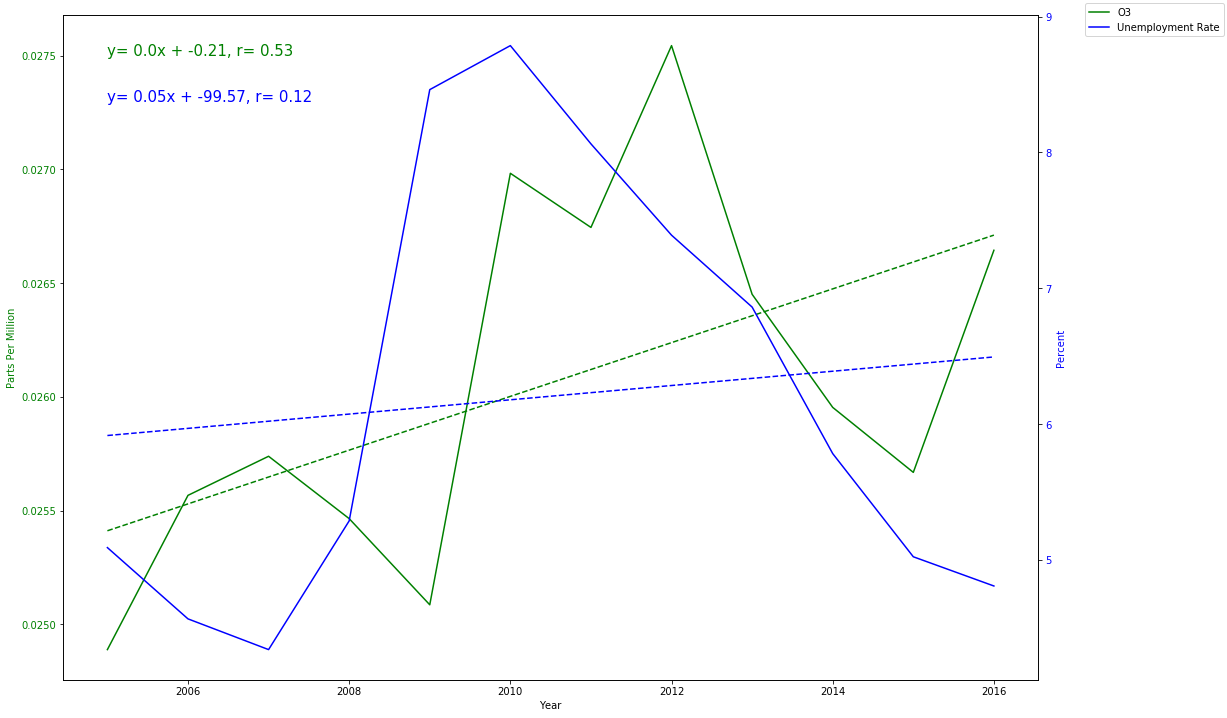

In [133]:
O3_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Value"])

O3_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"])

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Million', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of O3 Mean"], color=color, label = "O3")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,O3_line, color = 'green', linestyle = '--')
ax1.annotate(O3_line_eq, (2005,0.0275), fontsize = 15, color = "green")
ax1.annotate(employ_line_eq, (2005,0.0273), fontsize = 15, color = "blue")
ax2 = ax1.twinx()  

color = 'blue'
ax2.set_ylabel('Percent', color=color) 
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line, 'b--')
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout() 
plt.show()

fig.savefig('Images/O3_vs_Unemployment.png')

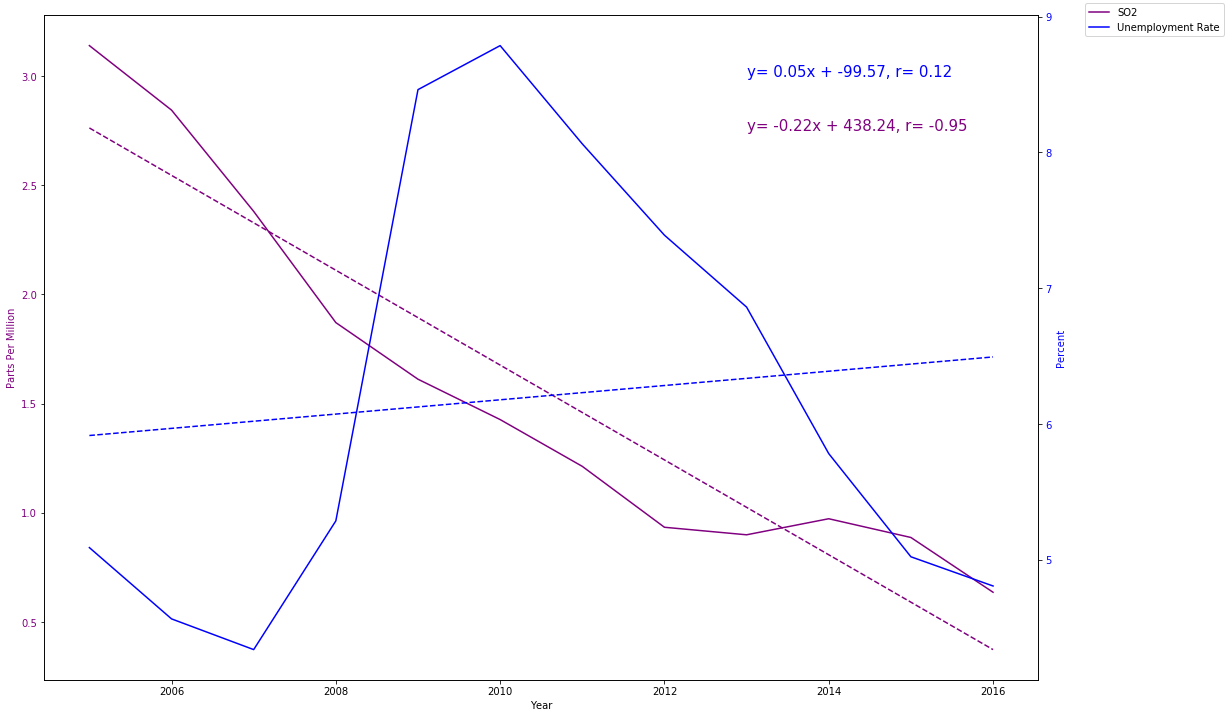

In [134]:
SO2_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of SO2 Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Value"])

SO2_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of SO2 Mean"])

fig, ax1 = plt.subplots(figsize=(15,10))

color = 'purple'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Million', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of SO2 Mean"], color=color, label = "SO2")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,SO2_line, color ='purple', linestyle = '--')
ax1.annotate(SO2_line_eq, (2013,2.75), fontsize = 15, color = "purple")
ax1.annotate(employ_line_eq, (2013,3.0), fontsize = 15, color = "blue")
ax2 = ax1.twinx()  

color = 'blue'
ax2.set_ylabel('Percent', color=color)
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line, 'b--')
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.show()

fig.savefig('Images/SO2_vs_Unemployment.png')

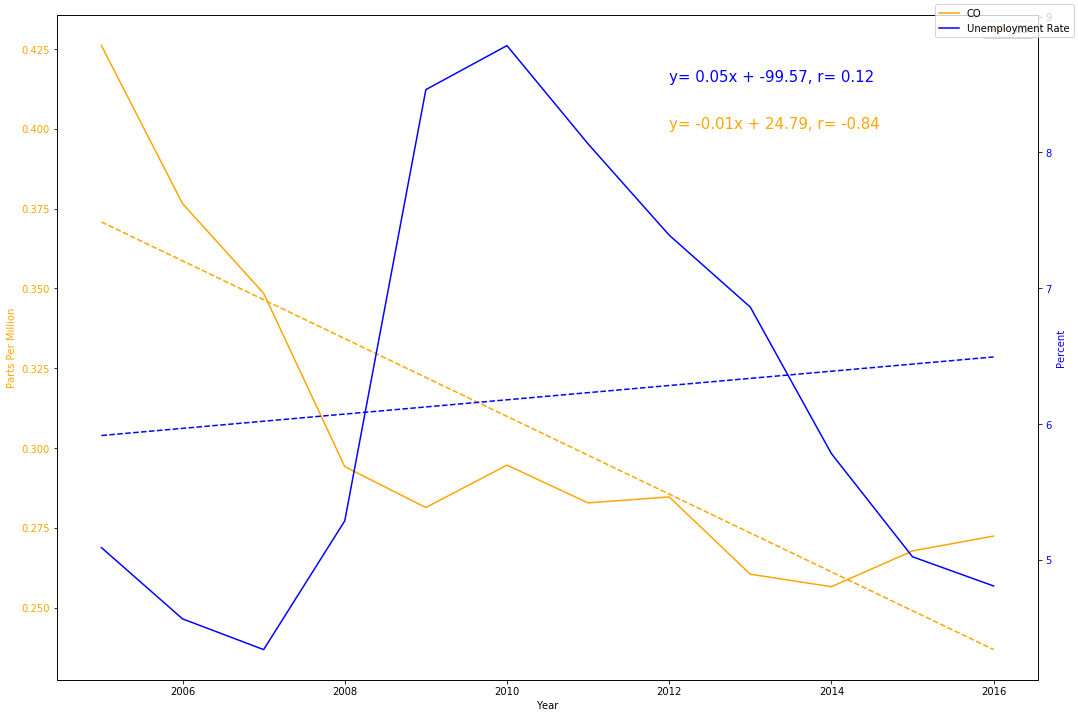

In [135]:
CO_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"])
employ_line = linear_regression(employ_pollutant_year.index, employ_pollutant_year["Value"])

CO_line_eq = linear_regression_eq(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"])

fig, ax1 = plt.subplots(figsize = (15,10))

color = 'orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Parts Per Million', color=color)
ax1.plot(employ_pollutant_year.index, employ_pollutant_year["Average of CO Mean"], color=color, label = "CO")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(employ_pollutant_year.index,CO_line, color = 'orange', linestyle = '--')
ax1.annotate(CO_line_eq, (2012,0.4), fontsize = 15, color = "orange")
ax1.annotate(employ_line_eq, (2012,0.415), fontsize = 15, color = "blue")
ax1.legend()
ax2 = ax1.twinx() 

color = 'blue'
ax2.set_ylabel('Percent', color=color)  
ax2.plot(employ_pollutant_year.index, employ_pollutant_year["Value"], color=color, label = "Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(employ_pollutant_year.index,employ_line, 'b--')
fig.legend()
fig.tight_layout()
plt.show()


fig.savefig('Images/CO_vs_Unemployment.png')